In [2]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd

# Dataset 

References:

[1] Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

[2] Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [2]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


# 1. Exploração inicial e pré-processamento 

In [3]:
data = data_K.get_data()

In [4]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064256795


Binding affinity values distribution

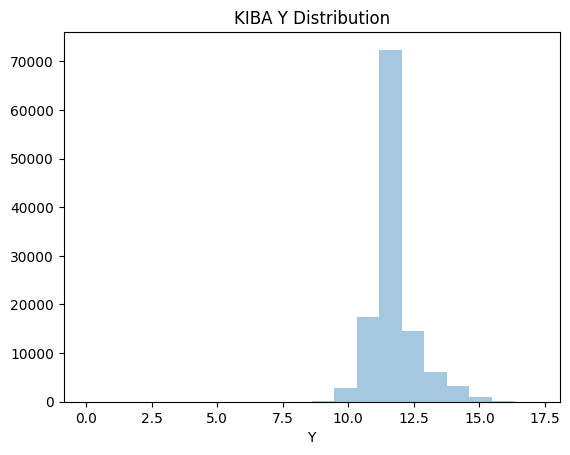

In [5]:
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

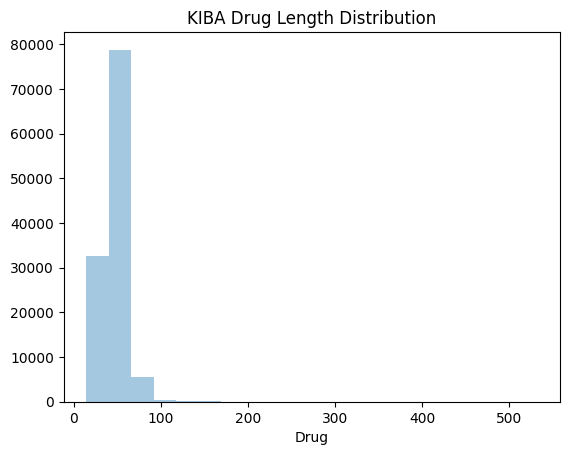

In [6]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

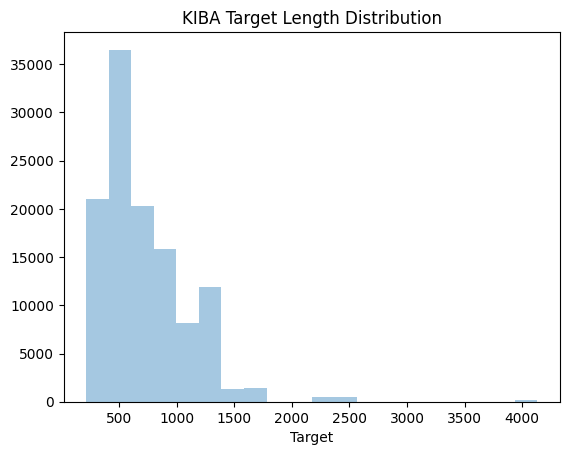

In [7]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

Data binarization - We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".


In [8]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending') 

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [9]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [10]:
data_binarized.get_data().Y.value_counts()

0    95091
1    22566
Name: Y, dtype: int64

The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [12]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized.to_csv('KIBA_binarized.csv', index = False)
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


# APARTIR DAQUI VER A MELHOR FORMA DE ORGANIZAR

# Drugs descriptors          # ver isto se querem assim

In [ ]:
descriptors_smiles = pd.read_csv('drugs_descriptors_smiles.csv')

In [ ]:
morgan_fingerprints = pd.read_csv('drugs_morgan_fingerprints.csv')

Remove nan

In [ ]:
# shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)
# Remove rows where all values are nan
descriptors = descriptors_smiles.dropna(how='all')
# don't forget to drop the same rows from the y column
#### y_descriptors = data['Y'].copy()[descriptors.index] ------- confirmar
y_descriptors = df_binarized['Y'].copy()[descriptors.index] #-------- confirmar

# we do the same for morgan_fingerprints
morgan_fingerprints = morgan_fingerprints.dropna(how='all')
#### y_morgan = data['Y'].copy()[morgan_fingerprints.index] ------- confirmar
y_morgan = df_binarized['Y'].copy()[morgan_fingerprints.index] #-------- confirmar
# as we can see, the shapes are the same, because there was no invalid molecule
descriptors.shape, y_descriptors.shape, morgan_fingerprints.shape, y_morgan.shape

In [ ]:
# Checking if any of the descriptors have columns with nan values
descriptors.isna().any().sum(), morgan_fingerprints.isna().any().sum() 

# Protein Descriptors

In [ ]:
protein_descriptors = pd.read_csv('protein_descriptors.csv')
protein_descriptors

# Drug Encondings

# Protein Encodings

In [3]:
protein_encoding = pd.read_csv('protein_encoding.csv')

# Bruno Termina Aqui

Standardizing descriptors

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptors_smiles)
scaled_descriptors

Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors)
selected_columns = descriptors.columns[selector.get_support()]
selected_descriptors.shape, selected_columns

UMAP (Dimensionality reduction)

In [ ]:
# UMAP
import umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors)

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue=y_descriptors)